In [7]:
#!pip install -q "nanopyx[jupyter]"
import numpy as np
import tifffile as tiff
from matplotlib import pyplot as plt
from nanopyx.liquid._le_interpolation_catmull_rom import ShiftAndMagnify 

In [10]:
crsm = ShiftAndMagnify()
dim_size  = [(5, r, 10) for r in range(10, 100001, 5000)]
task_run_times_unthreaded = []
task_run_times_threaded = []
task_run_times_threaded_static = []
task_run_times_threaded_guided = []
task_run_times_threaded_dynamic = []
task_run_times_opencl = []


In [11]:
for dim in dim_size:
    img = np.random.random(dim)
    print(dim)

    crsm.run(img, 0, 0, 2, 2,run_type="Threaded")
    task_run_times_threaded.append(crsm._last_run_time)
    a = crsm._last_run_time
    #print("Threaded finished")

    crsm.run(img,0, 0, 2, 2,run_type="Threaded_static")
    task_run_times_threaded_static.append(crsm._last_run_time)

    crsm.run(img,0, 0, 2, 2,run_type="Threaded_guided")
    task_run_times_threaded_guided.append(crsm._last_run_time)

    crsm.run(img,0, 0, 2, 2,run_type="Threaded_dynamic")
    task_run_times_threaded_dynamic.append(crsm._last_run_time)

    crsm.run(img,0, 0, 2, 2,run_type="Unthreaded")
    task_run_times_unthreaded.append(crsm._last_run_time)
    #print("UnThreaded finished")

    crsm.run(img,0, 0, 2, 2,run_type="OpenCL_Apple M1")
    task_run_times_opencl.append(crsm._last_run_time)
    #print("Threaded finished")
    
    b = crsm._last_run_time
    
    print(b/a)


(5, 10, 10)
6.696310004285741
(5, 5010, 10)
1.5576388782686854
(5, 10010, 10)
1.2280215945134152
(5, 15010, 10)
1.0020217943021863
(5, 20010, 10)
1.0573816145593027
(5, 25010, 10)
0.842858394678949
(5, 30010, 10)
0.8992527197289287
(5, 35010, 10)
0.8193981734466421
(5, 40010, 10)
0.7975069003896961
(5, 45010, 10)
0.8511159532692086
(5, 50010, 10)
0.8025714680938612
(5, 55010, 10)
0.7404525642010206
(5, 60010, 10)
0.686237964116462
(5, 65010, 10)
0.7340790567312331
(5, 70010, 10)
0.7044120411316717
(5, 75010, 10)
0.6920992710797952
(5, 80010, 10)
0.5800215441192734
(5, 85010, 10)
0.7449778978199413
(5, 90010, 10)
0.789596100156619
(5, 95010, 10)
0.5978455602886595


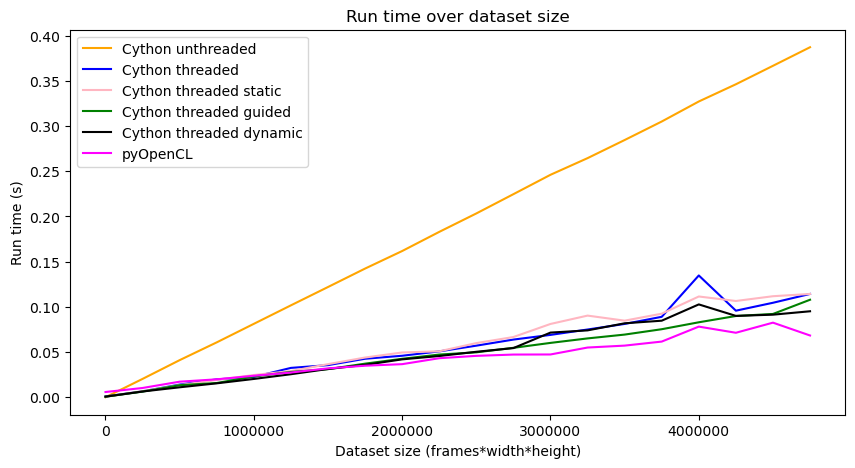

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(np.asarray(dim_size)[:, 1]*10*5, task_run_times_unthreaded, 'orange', label='Cython unthreaded')
plt.plot(np.asarray(dim_size)[:, 1]*10*5, task_run_times_threaded, 'blue', label='Cython threaded')
plt.plot(np.asarray(dim_size)[:, 1]*10*5, task_run_times_threaded_static, 'lightpink', label='Cython threaded static')
plt.plot(np.asarray(dim_size)[:, 1]*10*5, task_run_times_threaded_guided, 'green', label='Cython threaded guided')
plt.plot(np.asarray(dim_size)[:, 1]*10*5, task_run_times_threaded_dynamic, 'black', label='Cython threaded dynamic')
plt.plot(np.asarray(dim_size)[:, 1]*10*5, task_run_times_opencl, 'magenta', label='pyOpenCL')


#plt.yscale('log')
plt.xlabel('Dataset size (frames*width*height)')
plt.ylabel('Run time (s)')
plt.title('Run time over dataset size')
plt.legend()
plt.ticklabel_format(style="plain")
plt.show()